# ARIMA Example Notebook

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from climAPC_arima import examine_data, construct_ARIMA, forecast_ARIMA
from helpfuncs import check_for_errors
import matplotlib.pyplot as plt

In [2]:
#load example timeseries
t_series = np.genfromtxt('data/Pacific_warmpool_test.txt', delimiter =' ')
data = t_series[:,1]
time = t_series[:,0]

## 1. Testing the data
Test the data using the examine function to determine the needed intergration parameter d

no apparent errors found in timeseries


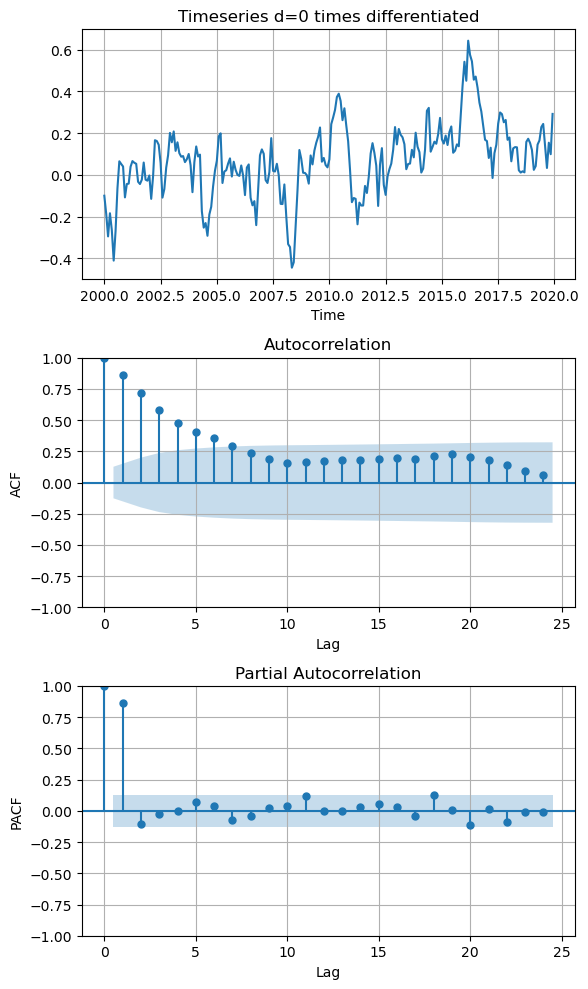

In [5]:
data, time = examine_data(data, time)


## 2. Differentiating 
The data does not look stationary, so let´s try to differentiate the data once (d = 1)

no apparent errors found in timeseries


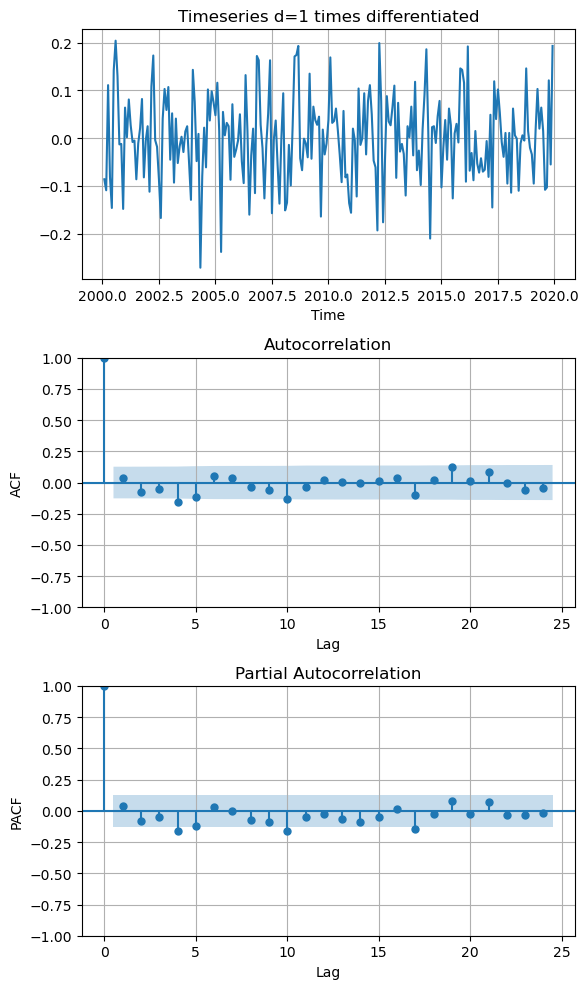

In [6]:
data,time = examine_data(data, time, d = 1)

# 3. Create the first ARIMA model
We just blindly use order (1,1,1)

no apparent errors found in timeseries
Fit complete: AIC for model of (1, 1, 1) and seasonality order (0, 0, 0, 0): -473.62 


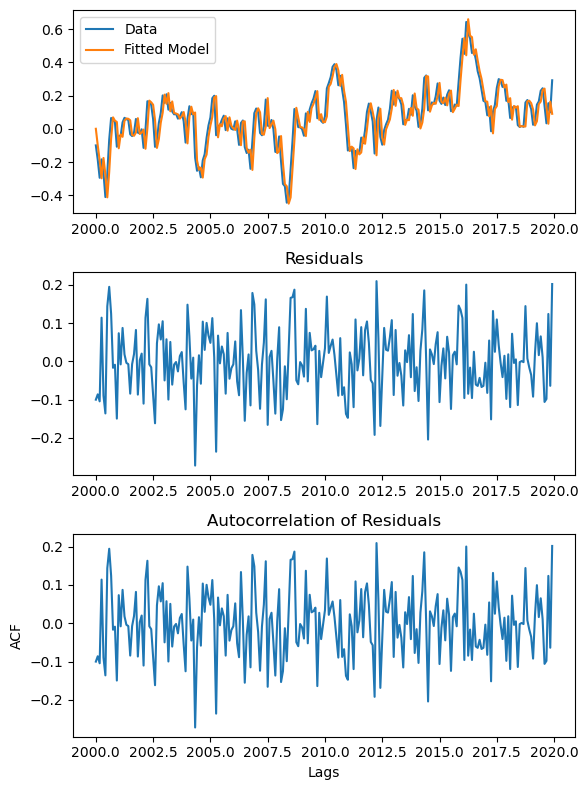

In [7]:
result,data,time = construct_ARIMA(data, time, order = (1,1,1))

When looking at the ACF and PACF  from the examine_data() funtion, a higher p could work better, so let´s try order = (2,1,1)

no apparent errors found in timeseries
Fit complete: AIC for model of (2, 1, 1) and seasonality order (0, 0, 0, 0): -489.25 


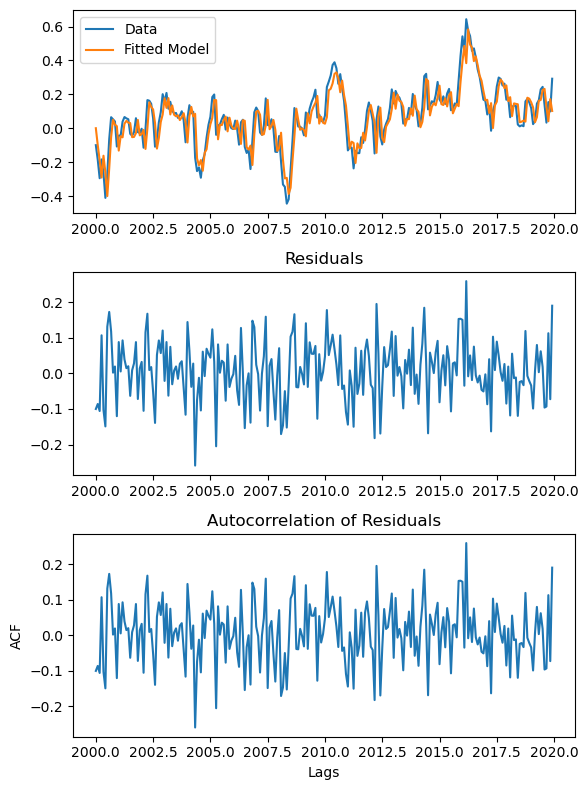

In [8]:
result,data,time = construct_ARIMA(data, time, order = (2,1,1))

The AIC score is slightly lower so we should choose this model over the previous. We could test all different model parameters (or even automate it, result.aic gives the AIC-score).
Or we could use the model to do some predictions and forecasting.

## 4. Forecasting and Predictions
To test if the model can predict reasonably well, we can try to let the model predict 16 months (steps = 16) starting from the second to last year (predict_index = 24) of the timeseries and compare to the real data.

Prediction
RMSE of prediction: 0.0008761790519740194


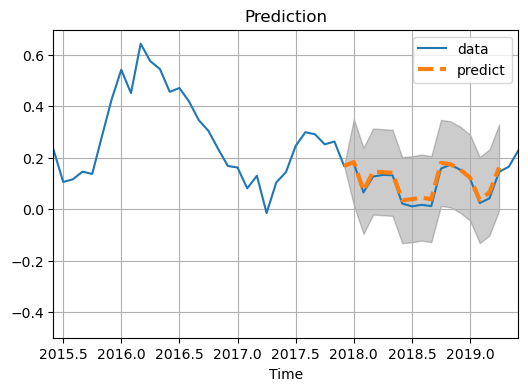

In [9]:
pred_val,pred_time = forecast_ARIMA(result,data,time, steps = 16, predict_index= 24)

To get a real forecast into the future we can ignore the predict_index. 

Forecast


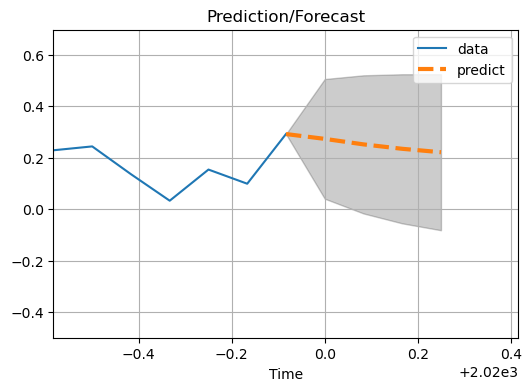

In [10]:
pred_val,pred_time = forecast_ARIMA(result,data,time, steps = 4)

Have fun trying out different datasets in the data folder and/or try a SARIMAX model by using the season = (Q,D,P,m) argument.